In [1]:
import os

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fillKNN_data_final_final.csv')
df = df.drop(['curbWeight', 'vEengineDisplacement'], axis=1)

In [3]:
df.isna().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
fuelType                   0
height                     0
length                     0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEenginePower              0
vEengineType               0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64

For price column, we log price to reduce noise in training process

In [4]:
# creating X and y variables
X = df.drop('price', axis=1)
# price column
y = np.log(df['price'])
# y = df['price']

Train test split with ratio 7:3

In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

Use standard scaler to normalize data

In [8]:
# feature scale the X_train and X_test values

norm = StandardScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[ 0.26817624  1.02853546  1.30093125 ... -0.08984045 -0.11834729
  -0.02186081]
 [ 0.09929749 -0.82699208  0.45442133 ... -0.6275459  -0.3007515
  -0.73831059]
 [-0.37356299 -0.82699208 -1.62658223 ... -0.03606991 -0.45096672
  -0.0805862 ]
 ...
 [-0.81264773  1.49241734  1.30093125 ...  1.25442317  0.82049787
   1.04694131]
 [-0.30601149  1.02853546  0.98349003 ...  0.004258    0.04259759
  -0.49166395]
 [ 0.06552175 -0.3631102   0.8071338  ...  1.09311153  1.37844013
   1.55197968]]


[[-1.4881627   1.49241734 -1.62658223 ...  2.23573561  1.78080234
   2.30366469]
 [ 1.88941219  1.02853546  0.84240504 ... -0.86951335 -1.07328694
  -1.47825052]
 [-1.42061121  1.49241734 -0.28627485 ...  1.81901389  1.13702281
   2.09225328]
 ...
 [-0.57621748  1.02853546 -1.62658223 ...  0.71671772  0.52543224
   0.44794232]
 [-0.103357    1.49241734  0.98349003 ...  0.31343863 -0.25246803
   0.09558997]
 [ 0.26817624  1.02853546  1.30093125 ...  0.6360619   0.61126952
   1.09392162]]


In [9]:
# Fitting linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [10]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
# Fitting extra trees regressor

etr = ExtraTreesRegressor(random_state = 123 , max_depth = 45  , n_estimators = 400)
etr.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=45, n_estimators=400, random_state=123)

In [12]:
#Fitting light gbm model on the train data

lgbm = LGBMRegressor(random_state = 123 ,  num_leaves = 750 , learning_rate = 0.01, max_bin = 1200 , n_estimators = 1000)
lgbm.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_bin=1200, n_estimators=1000,
              num_leaves=750, random_state=123)

In [13]:
#Fitting xgboost regressor model on the train data

xgb = XGBRegressor(random_state = 123 , max_depth = 7 , learning_rate = 0.2 , n_estimators = 1500)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
#Fitting random forest regressor model on the train data

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [15]:
#Fitting catboost regressor model on the train data

cat = CatBoostRegressor(random_state = 123  , max_depth = 14 )
cat.fit(X_train,y_train, verbose = False)

TRAIN SCORE

In [16]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'ExtraTreesRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor'],

    'score': [linear.score(X_train, y_train), knn.score(X_train, y_train), etr.score(X_train, y_train),
              lgbm.score(X_train, y_train), xgb.score(X_train, y_train) , rf.score(X_train, y_train),
              cat.score(X_train, y_train)]
    })
train_score

,model,score
0,LinearRegressor,0.927782
1,KNeighborsRegressor,0.982683
2,ExtraTreesRegressor,0.994267
3,LGBMRegressor,0.992579
4,XGBRegressor,0.994023
5,RandomForestRegressor,0.993186
6,CatBoostRegressor,0.992881


In [17]:
linear_pred = np.exp(linear.predict(X_test))
knn_pred = np.exp(knn.predict(X_test))
etr_pred = np.exp(etr.predict(X_test))
lgbm_pred = np.exp(lgbm.predict(X_test))
xgb_pred = np.exp(xgb.predict(X_test))
rf_pred = np.exp(rf.predict(X_test))
cat_pred = np.exp(cat.predict(X_test))

y_test = np.exp(y_test)

EVALUATION TEST

In [18]:
# Generalisation
best_model = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'ExtraTreesRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor'],

    'mae': [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred),
            mean_absolute_error(y_test, etr_pred), mean_absolute_error(y_test, lgbm_pred),
            mean_absolute_error(y_test, xgb_pred), mean_absolute_error(y_test, rf_pred),
            mean_absolute_error(y_test, cat_pred)],

    'mse': [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred),
            mean_squared_error(y_test, etr_pred), mean_squared_error(y_test, lgbm_pred),
            mean_squared_error(y_test, xgb_pred), mean_squared_error(y_test, rf_pred),
            mean_squared_error(y_test, cat_pred)],

    'rmse': [np.sqrt(mean_squared_error(y_test, linear_pred)),
             np.sqrt(mean_squared_error(y_test, knn_pred)),
             np.sqrt(mean_squared_error(y_test, etr_pred)),
             np.sqrt(mean_squared_error(y_test, lgbm_pred)),
             np.sqrt(mean_squared_error(y_test, xgb_pred)),
             np.sqrt(mean_squared_error(y_test, rf_pred)),
             np.sqrt(mean_squared_error(y_test, cat_pred))],
    'r2_score': [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred),
                 r2_score(y_test, etr_pred), r2_score(y_test, lgbm_pred),
                 r2_score(y_test, xgb_pred), r2_score(y_test, rf_pred),
                 r2_score(y_test, cat_pred)]
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,4.985909,127.931424,11.310677,0.866144
1,KNeighborsRegressor,2.958373,62.410658,7.900042,0.934699
2,ExtraTreesRegressor,2.508420,40.376127,6.354221,0.957754
3,LGBMRegressor,2.303172,36.166327,6.013845,0.962159
4,XGBRegressor,2.334482,36.669758,6.055556,0.961632
5,RandomForestRegressor,2.462064,38.316124,6.190002,0.959909
6,CatBoostRegressor,2.272500,51.727216,7.192164,0.945877


DEMO ON TEST RESULT

In [31]:
# cat boost regressor
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(cat_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    90.73000000000002
Predict price: 96.02291604731357


Real price:    17.755000000000003
Predict price: 14.568021852664035


Real price:    118.855
Predict price: 115.22921318907848


Real price:    49.17
Predict price: 46.00697247870857


Real price:    35.135
Predict price: 36.20034878190626




In [20]:
import matplotlib.pyplot as plt

In [41]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.savefig(f'image/result_model_{model}.png')
    plt.show()


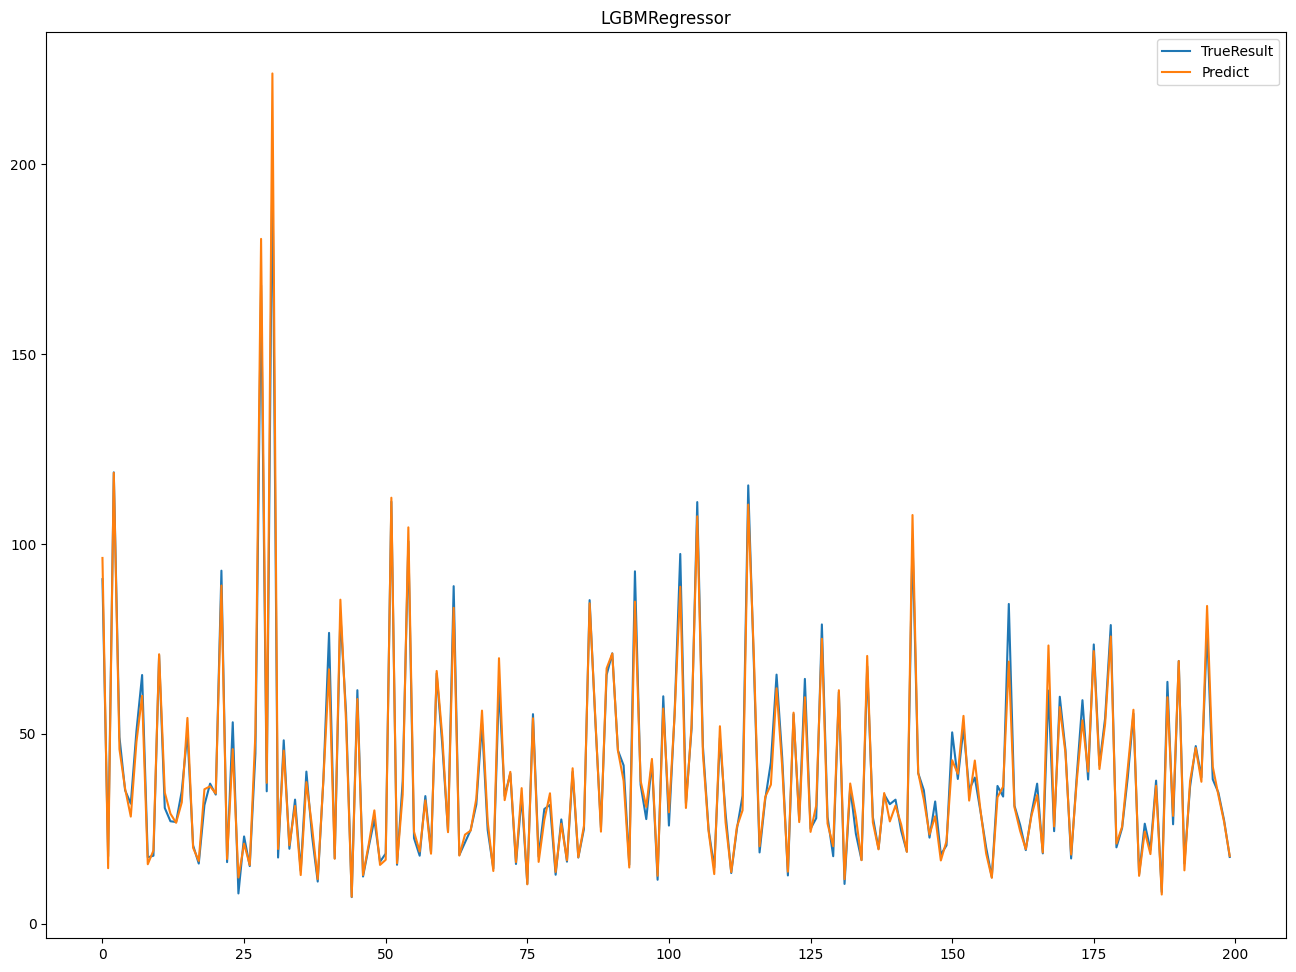

In [42]:
# LGBMRegressor
plot_result(lgbm_pred, y_test, low=0, num=200, model='LGBMRegressor')

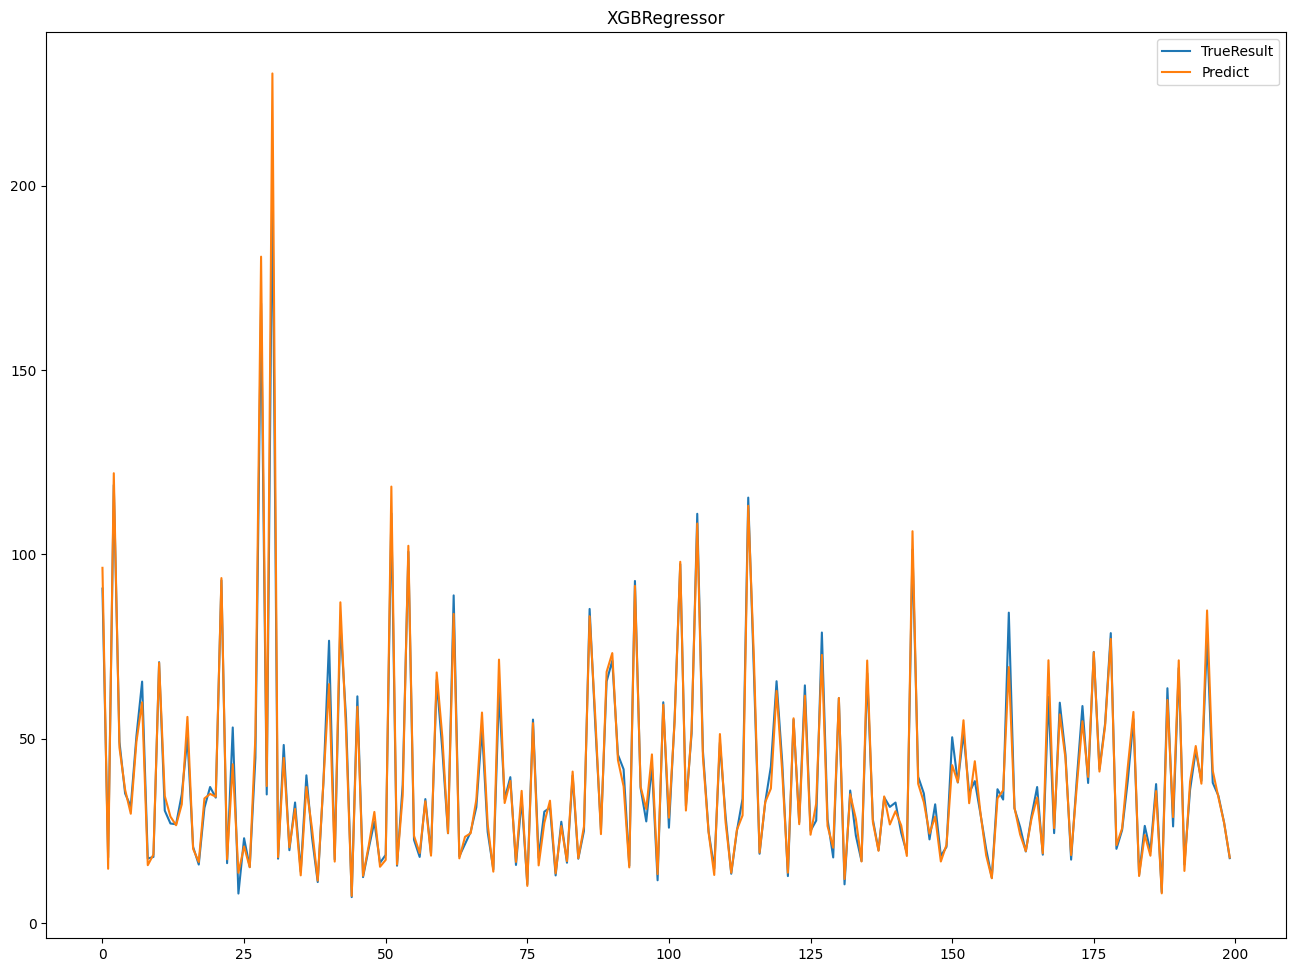

In [43]:
# ExtraTreesRegressor
plot_result(xgb_pred, y_test, low=0, num=200, model='XGBRegressor')

In [48]:
# save model
import pickle
pickle.dump(linear, open('model/LinearRegressor.sav', 'wb'))
pickle.dump(knn, open('model/KNeighborsRegressor.sav', 'wb'))
pickle.dump(etr, open('model/ExtraTreesRegressor.sav', 'wb'))
pickle.dump(lgbm, open('model/LGBMRegressor.sav', 'wb'))
pickle.dump(xgb, open('model/XGBRegressor.sav', 'wb'))
pickle.dump(rf, open('model/RandomForestRegressor.sav', 'wb'))
pickle.dump(cat, open('model/CatBoostRegressor.sav', 'wb'))

In [ ]:

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
# Fitting linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)